In [28]:
import rebound
import reboundx
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

In [29]:
sim = rebound.Simulation.from_file("checkpoint.bin")
#sim.status()

In [30]:
Noutputs = 50000
year = 5000 # One year in units where G=1
times = np.linspace(0.,year, Noutputs)
# x = np.zeros((2,Noutputs))
# y = np.zeros((2,Noutputs))
# z = np.zeros((2,Noutputs))
P_C = np.zeros((Noutputs))
P_E = np.zeros((Noutputs))
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))


In [31]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
        print(ps[3].orbit.P)
    sim.integrate(time)
    P_C[i] = ps[5].orbit.P
    P_E[i] = ps[3].orbit.P

0
1.0000033505103132
10000
1.0000088917966652
20000
1.0000409762789546
30000
1.0000045623048994
40000
1.0000296245263272


In [32]:
sim = rebound.Simulation.from_file("checkpoint.bin")
print(sim.particles[5])
sim.move_to_com()

rebx = reboundx.Extras(sim)

#sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
rf = rebx.add("gr")
#print(sim.particles[5].params)

rf.params["c"] = 63197.8
#sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
#sim.particles[5].params["beta"] = 10e-10
#sim2.save("radiation.bin")

<rebound.Particle object, m=3.287781142545315e-47 x=0.5434148825598897 y=-0.9364034027348183 z=0.04263616002725609 vx=5.507880166413729 vy=-0.25612052748151487 vz=-1.546260416932923>


In [33]:

# pprint(vars(your_object))

#     x[0][i] = ps[3].x   # Earth This stores the data which allows us to plot it later
#     y[0][i] = ps[3].y
#     z[0][i] = ps[3].z
#     x[1][i] = ps[5].x   # Cruithne
#     y[1][i] = ps[5].y
#     z[1][i] = ps[5].z

In [34]:
 
#rf.params["c"] = 63197.8
##sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
#sim.particles[-1].params["beta"] = 0.03
#sim2.save("radiation.bin")



# grain_radius = 5000 # grain radius in m
# print(ps[3].r)
# print(ps[5].r)
# density = 1000. # kg/m^3 = 1g/cc
# Q_pr = 1.
# luminosity = 3.85e26 # Watts
# ps[5].params["beta"] = rebx.rad_calc_beta(6.67e-11, 3e8, 2e30, luminosity, grain_radius, density, Q_pr)
# print("Particle 5's beta parameter = {0}".format(ps[5].params["beta"]))

# ps[5].params["beta"] = rebx.rad_calc_beta(sim.G, rf.params["c"], 1, luminosity, grain_radius/149597870700, density, Q_pr)
# print("Particle 5's beta parameter = {0}".format(ps[5].params["beta"]))

In [35]:

P_C_rad = np.zeros((Noutputs))
P_E_rad = np.zeros((Noutputs))
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
        print(ps[3].orbit.P)
    sim.integrate(time)
    P_C_rad[i] = ps[5].orbit.P
    P_E_rad[i] = ps[3].orbit.P
    x[0][i] = ps[0].x   # Earth This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[5].x   # Cruithne
    y[1][i] = ps[5].y
    z[1][i] = ps[5].z

0
1.0000033505103132
10000
1.0000088757435652
20000
1.0000409810644255
30000
1.000004567374222
40000
1.0000296039893304


<IPython.core.display.Javascript object>


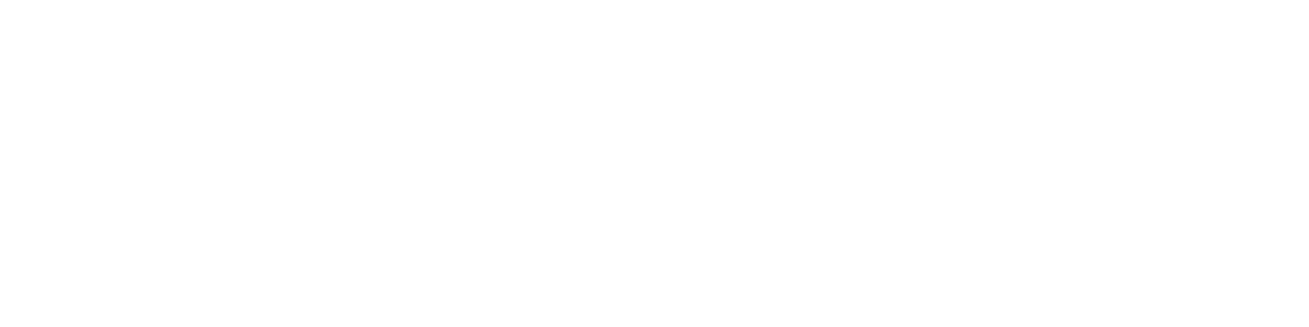

In [36]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("period [yrs]")
plt.plot(times, P_C);
plt.plot(times, P_E);
plt.plot(times, P_C_rad);
plt.legend(['Cruithne','Earth','Radiation'])

In [37]:
print(np.average(P_C))
print(np.average(P_C_rad))

0.9999432070871684
0.9999069043699272


<IPython.core.display.Javascript object>


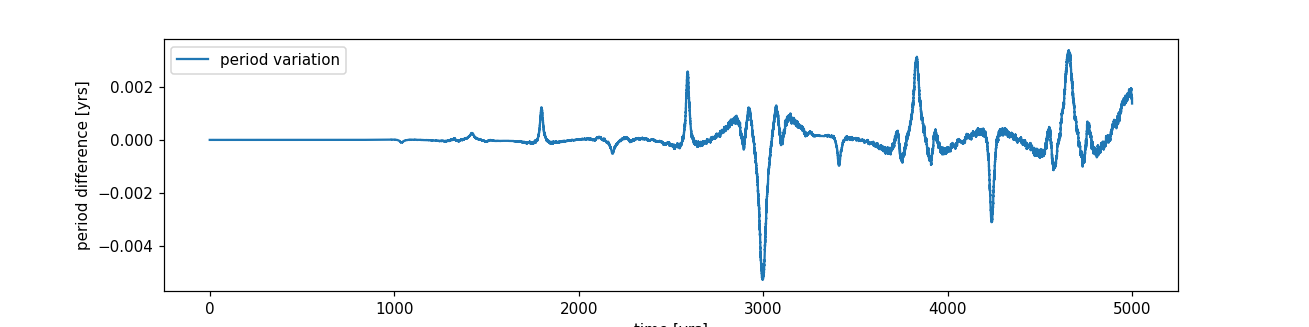

In [38]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
ax.set_xlabel("time [yrs]")
ax.set_ylabel("period difference [yrs]")
plt.plot(times, (P_C-P_C_rad));
#plt.plot(times, distance/1e7)
plt.legend(['period variation','distance from sun','Radiation'])

In [39]:
print((365*24)*0.005)

43.800000000000004
